# Variáveis relacionadas às famílias acolhedoras

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dados_gerais = pd.read_csv('../data/familia_acolhedora/dados_gerais_tratado.csv')

In [3]:
df_dados_gerais.head()

,IBGE,NU_IDENTIFICADOR,municipio,uf,data_implementacao_unidade,Latitude,Longitude,natureza_unidade,custo_manutencao,servico_regulamentado,...,coordenador_saf_situacao,capaci_equipe_tec_saf_presencial,capaci_equipe_tec_saf_ead,capaci_equipe_tec_saf_nao_faz,capaci_equipe_tec_saf_presencial_qtd,capaci_equipe_tec_saf_ead_qtd,IBGE7,nome_da_uf,Regiao,Município
0,110011,"1,10011E+12",JARU,RO,29/03/2023,-10.439,-62.466,Governamental,NaN,"Sim, por lei",...,Exerce concomitantemente a função de coordenad...,Não,Não,Não,NaN,NaN,1100114,Rondonia,Região Norte,Jaru
1,110012,"1,10012E+12",JI-PARANA,RO,02/01/2022,-10.876.486.067.028.500,-619.596.290.588.379,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Sim,Sim,Não,3.0,4.0,1100122,Rondonia,Região Norte,Ji-Paraná
2,110020,"1,1002E+12",PORTO VELHO,RO,13/12/2017,-915.359.258.390.788,-643.068.141.967.022,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Sim,Sim,Não,5.0,5.0,1100205,Rondonia,Região Norte,Porto Velho
3,120040,"1,2004E+12",RIO BRANCO,AC,17/05/2013,-9.948.852.227.687.540,-6.785.414.814.949.030,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Não,Não,Sim,NaN,NaN,1200401,Acre,Região Norte,Rio Branco
4,130170,"1,3017E+12",HUMAITA,AM,28/12/2020,-7.519.639.784.496.380,-63.031.353.950.500.400,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Não,Não,Sim,NaN,NaN,1301704,Amazonas,Região Norte,Humaitá


In [4]:
df_dados_gerais.columns.tolist()

['IBGE',
 'NU_IDENTIFICADOR',
 'municipio',
 'uf',
 'data_implementacao_unidade',
 'Latitude',
 'Longitude',
 'natureza_unidade',
 'custo_manutencao',
 'servico_regulamentado',
 'ano_implementacao_servico',
 'subsidio_valor_mensal',
 'subsidio_itens_manutencao',
 'subsidio_mobiliario_transporte',
 'subsidio_isencao_imposto_taxa',
 'subsidio_outros',
 'subsidio_nao_repassa',
 'subsidio_outros_quais',
 'fam_aceita_vinculo_irmaos',
 'qtd_criancas_acolhidas',
 'qtd_criancas_acolhidas_12meses',
 'qtd_masc_0_2',
 'qtd_masc_3_5',
 'qtd_masc_6_11',
 'qtd_masc_12_13',
 'qtd_masc_14_15',
 'qtd_masc_16_17',
 'qtd_masc_acima_18',
 'qtd_masc_total',
 'qtd_fem_0_2',
 'qtd_fem_3_5',
 'qtd_fem_6_11',
 'qtd_fem_12_13',
 'qtd_fem_14_15',
 'qtd_fem_16_17',
 'qtd_fem_acima_18',
 'qtd_refugiados_imigrantes',
 'qtd_venezuelanos',
 'qtd_criancas_tempo_servico_menos_1mes',
 'qtd_criancas_tempo_servico_1_3meses',
 'qtd_criancas_tempo_servico_4_6meses',
 'qtd_criancas_tempo_servico_7_12meses',
 'qtd_criancas_te

### Variável 'fam_aceita_vinculo_irmaos'

In [6]:
freq_aceita_irmaos = df_dados_gerais['fam_aceita_vinculo_irmaos'].value_counts(dropna=True)

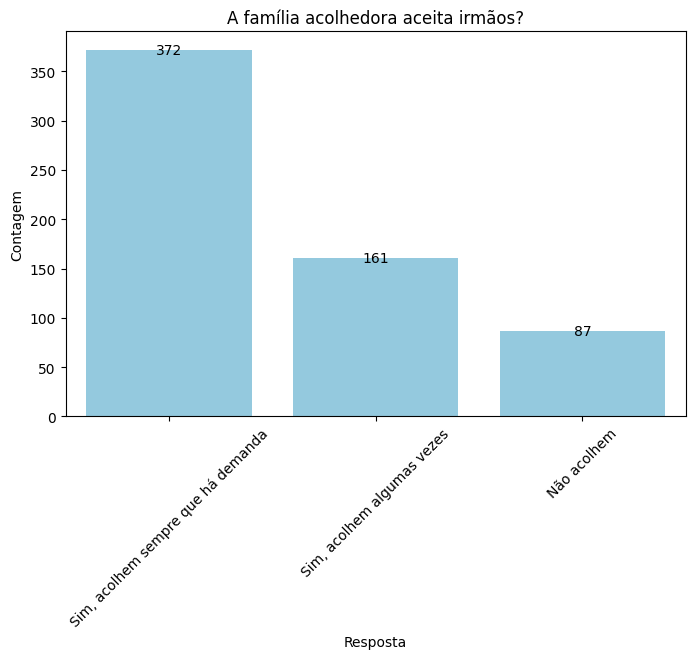

In [13]:
# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=freq_aceita_irmaos.index, y=freq_aceita_irmaos.values, color='skyblue')

# Adicionando as quantidades dentro das barras
for i, v in enumerate(freq_aceita_irmaos.values):
    ax.text(i, v - 0.1, str(v), color='black', ha='center', va='center') 
    
plt.title(f'A família acolhedora aceita irmãos?')
plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

plt.show()

### Variáveis relacionadas à quantidade de família acolhedora - em processo e aptas/acolhendo

In [26]:
df_qtd_fam = df_dados_gerais.groupby(['uf', 'Regiao'])['qtd_fam_aptas_ou_acolhendo'].sum().reset_index()

In [27]:
df_qtd_fam.sort_values(by='qtd_fam_aptas_ou_acolhendo', ascending=False)

,uf,Regiao,qtd_fam_aptas_ou_acolhendo
16,PR,Região Sul,817
9,MG,Região Sudeste,522
21,SC,Região Sul,432
22,SP,Região Sudeste,410
17,RJ,Região Sudeste,200
20,RS,Região Sul,178
10,MS,Região Centro Oeste,81
3,BA,Região Nordeste,75
13,PB,Região Nordeste,61
1,AM,Região Norte,51


In [30]:
# Define cores para cada região
cores_regiao = {
    'Região Norte': 'blue', 'Região Nordeste': 'green', 'Região Centro Oeste': 'orange',
    'Região Sudeste': 'red', 'Região Sul': 'purple'
}

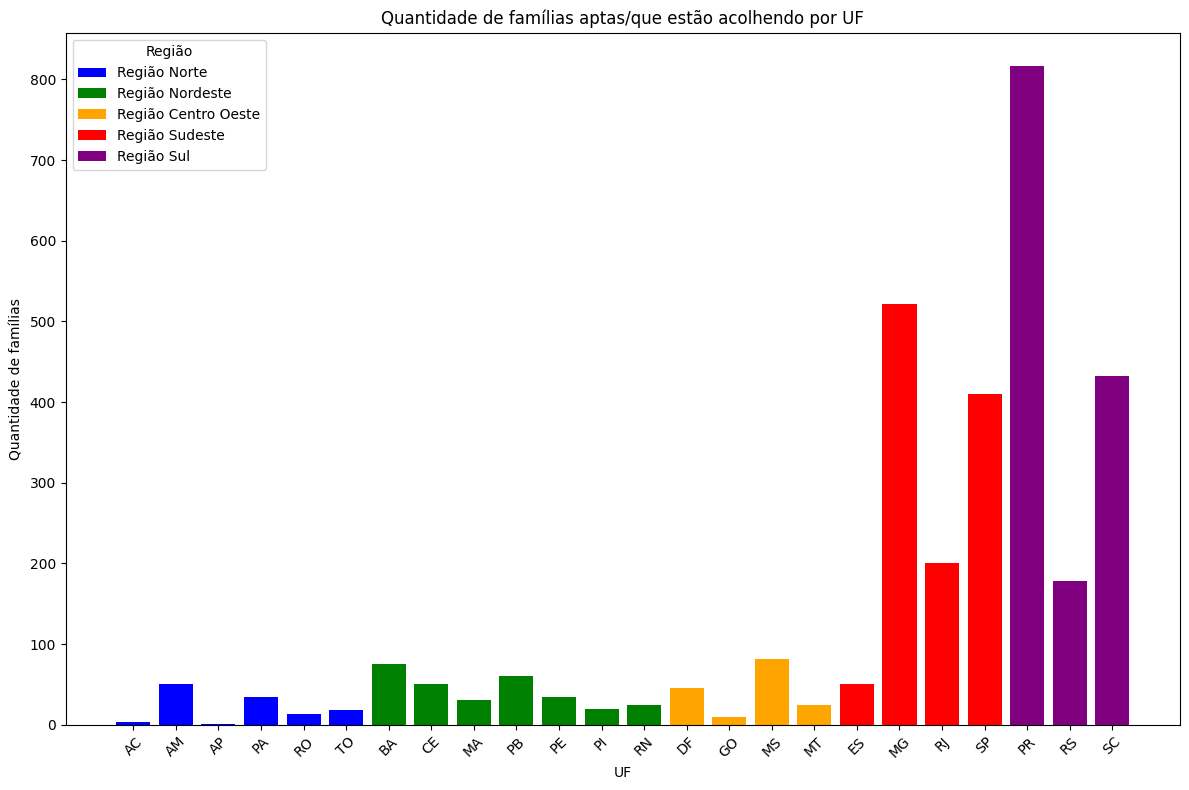

In [31]:
# Cria o gráfico de barras para média de famílias aptas/acolhendo
plt.figure(figsize=(12, 8))
for regiao, cor in cores_regiao.items():
    subset = df_qtd_fam [df_qtd_fam ['Regiao'] == regiao]
    plt.bar(subset['uf'], subset['qtd_fam_aptas_ou_acolhendo'], label=regiao, color=cor)

# Configurações do gráfico
plt.title('Quantidade de famílias aptas/que estão acolhendo por UF')
plt.xlabel('UF')
plt.ylabel('Quantidade de famílias')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.tight_layout()
plt.show()

In [17]:
df_qntd_fam = df_dados_gerais.groupby('uf')[['qtd_fam_processo_habilitacao', 'qtd_fam_aptas_ou_acolhendo']].sum().reset_index()

In [18]:
# Reorganizando o DataFrame para que as colunas 'qtd_fam_processo_habilitacao' e 'qtd_fam_aptas_ou_acolhendo'
# fiquem em uma única coluna para facilitar a plotagem
df_agrupado_melted = df_qntd_fam.melt(id_vars='uf', value_vars=['qtd_fam_processo_habilitacao', 'qtd_fam_aptas_ou_acolhendo'], 
                                      var_name='Categoria', value_name='Quantidade')

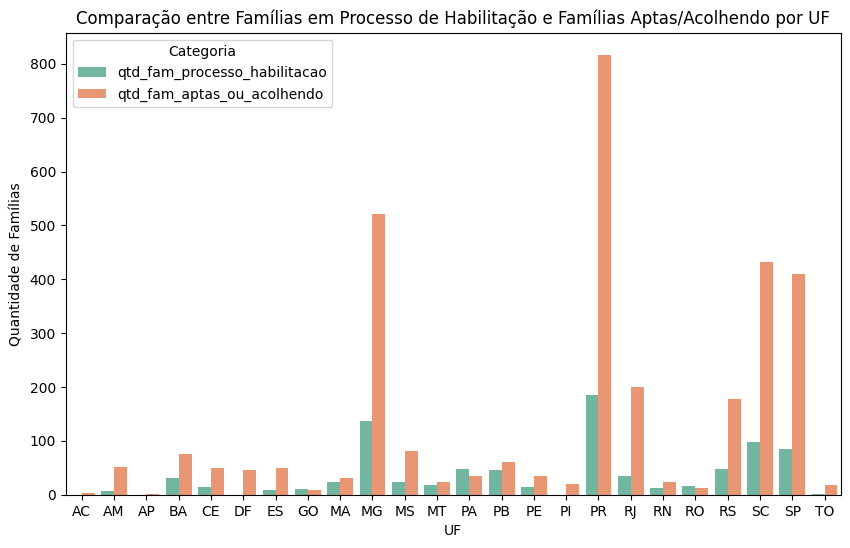

In [19]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='uf', y='Quantidade', hue='Categoria', data=df_agrupado_melted, palette='Set2')

# Adicionando título e rótulos
plt.title('Comparação entre Famílias em Processo de Habilitação e Famílias Aptas/Acolhendo por UF')
plt.xlabel('UF')
plt.ylabel('Quantidade de Famílias')

# Exibindo o gráfico
plt.show()

In [20]:
df_dados_gerais['num_atual_fam_suficiente'].value_counts()

Não                  299
Sim                  265
Não sabe informar     56
Name: num_atual_fam_suficiente, dtype: int64

In [22]:
df_agrupado_suficiente = df_dados_gerais.groupby(['uf', 'num_atual_fam_suficiente']).size().reset_index(name='contagem')

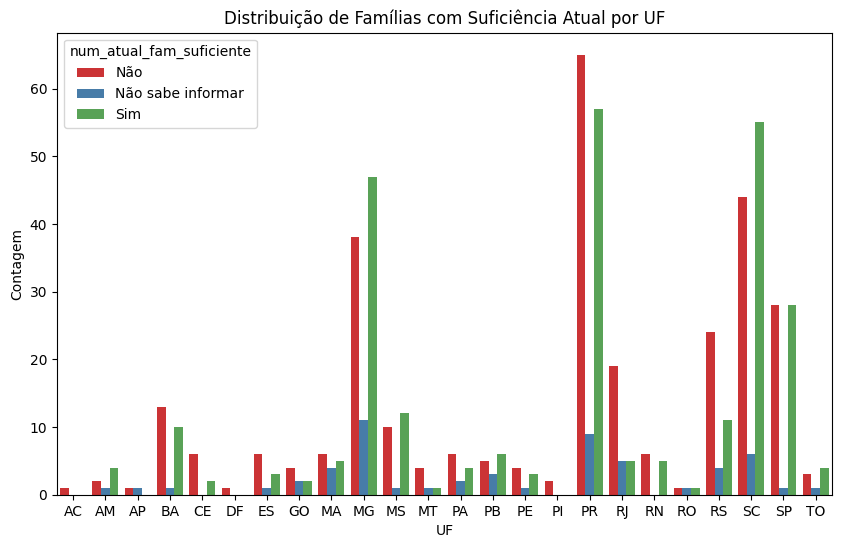

In [23]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='uf', y='contagem', hue='num_atual_fam_suficiente', data=df_agrupado_suficiente, palette='Set1')

# Adicionando título e rótulos
plt.title('Distribuição de Famílias com Suficiência Atual por UF')
plt.xlabel('UF')
plt.ylabel('Contagem')

# Exibindo o gráfico
plt.show()

### Variáveis relacionadas ao perfil dos responsáveis familiares cadastrados

In [32]:
df_resp_familiar = pd.read_csv('../data/familia_acolhedora/resp_familiar_tratado.csv')

In [33]:
df_resp_familiar.head()

,IBGE,NU_IDENTIFICADOR,rf_sexo,rf_escolaridade,rf_profissao,rf_vinculo,Nome_UF,Código Município Completo,Nome_Município
0,291270,"2,9127E+12",Feminino,Médio Completo,Profissional de nível médio,Outro vínculo não permanente,Bahia,291270,Ibirapitanga
1,311910,"3,1191E+12",Feminino,Fundamental Completo,Sem formação profissional,Voluntária(o),Minas Gerais,311910,Corinto
2,330350,"3,3035E+12",Feminino,Médio Completo,Profissional de nível médio,Servidor(a) Estatutário(a),Rio de Janeiro,330350,Nova Iguaçu
3,351040,"3,5104E+12",Feminino,Superior Completo,Profissional de nível médio,Voluntária(o),São Paulo,351040,Capivari
4,353440,"3,5344E+12",Feminino,Especialização,Advogada(o),Sem Vínculo,São Paulo,353440,Osasco


In [35]:
# Definir a ordem personalizada para a coluna 'rf_escolaridade'
ordem_escolaridade = [
    'Sem Escolaridade', 'Fundamental Incompleto', 'Fundamental Completo',
    'Médio Incompleto', 'Médio Completo', 'Superior Incompleto',
    'Superior Completo', 'Especialização', 'Mestrado', 'Doutorado'
]

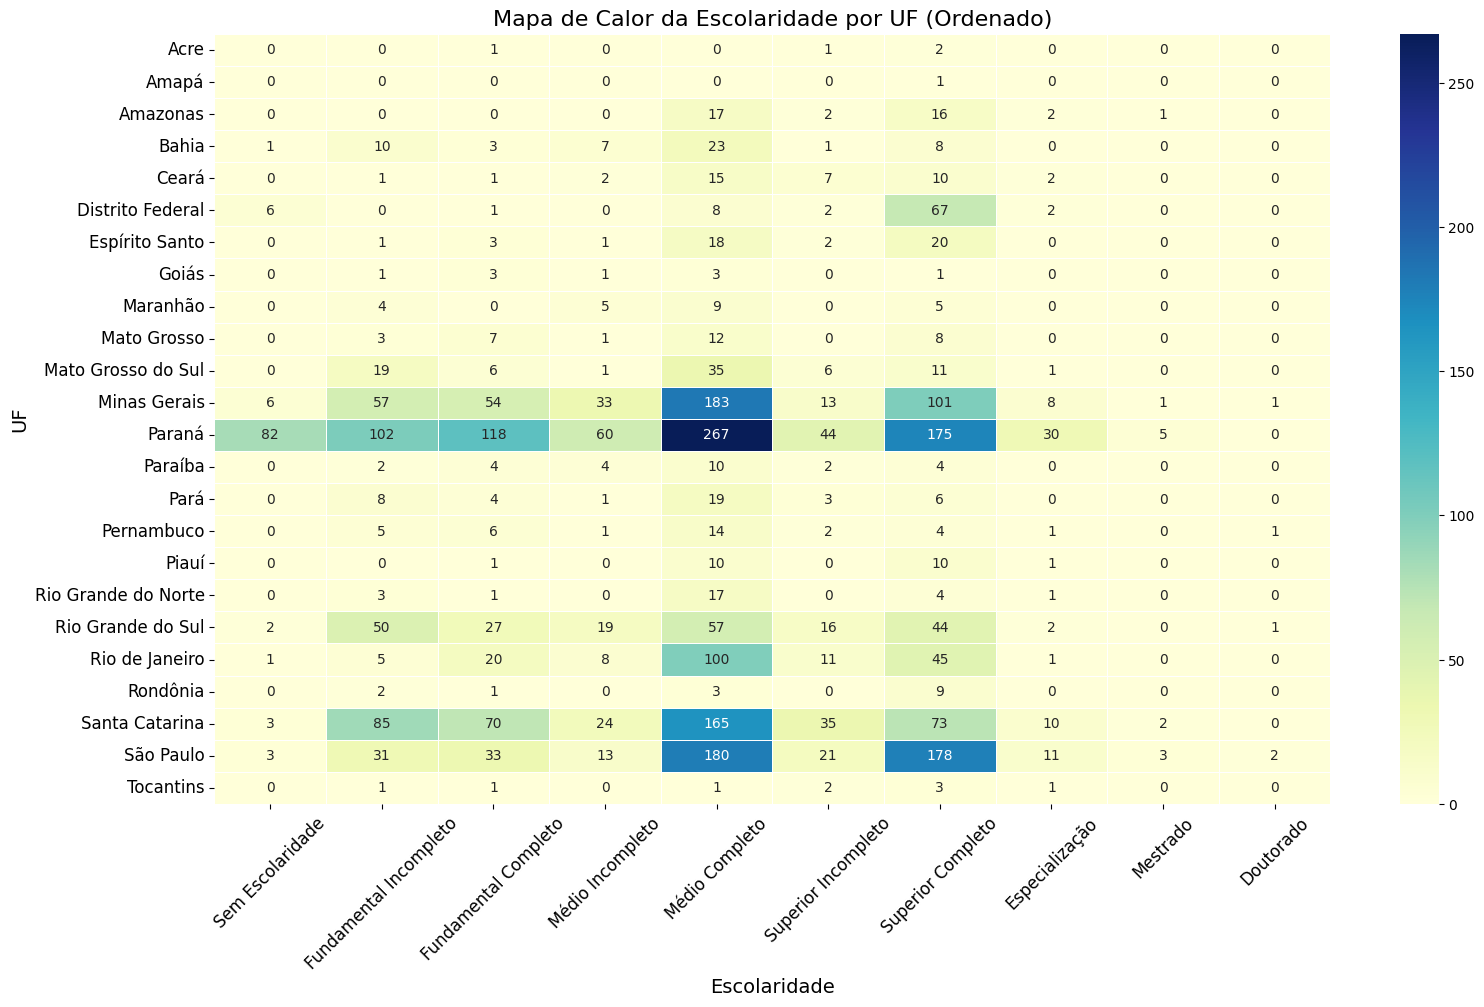

In [36]:
# Criar a tabela de contingência e ordenar as colunas conforme a ordem definida
escolaridade_por_uf = pd.crosstab(df_resp_familiar['Nome_UF'], df_resp_familiar['rf_escolaridade'])[ordem_escolaridade]

# Criar o heatmap com a nova ordem
plt.figure(figsize=(18, 10))
sns.heatmap(escolaridade_por_uf, annot=True, fmt="d", cmap='YlGnBu', linewidths=0.5)
plt.title('Mapa de Calor da Escolaridade por UF (Ordenado)', fontsize=16)
plt.xlabel('Escolaridade', fontsize=14)
plt.ylabel('UF', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

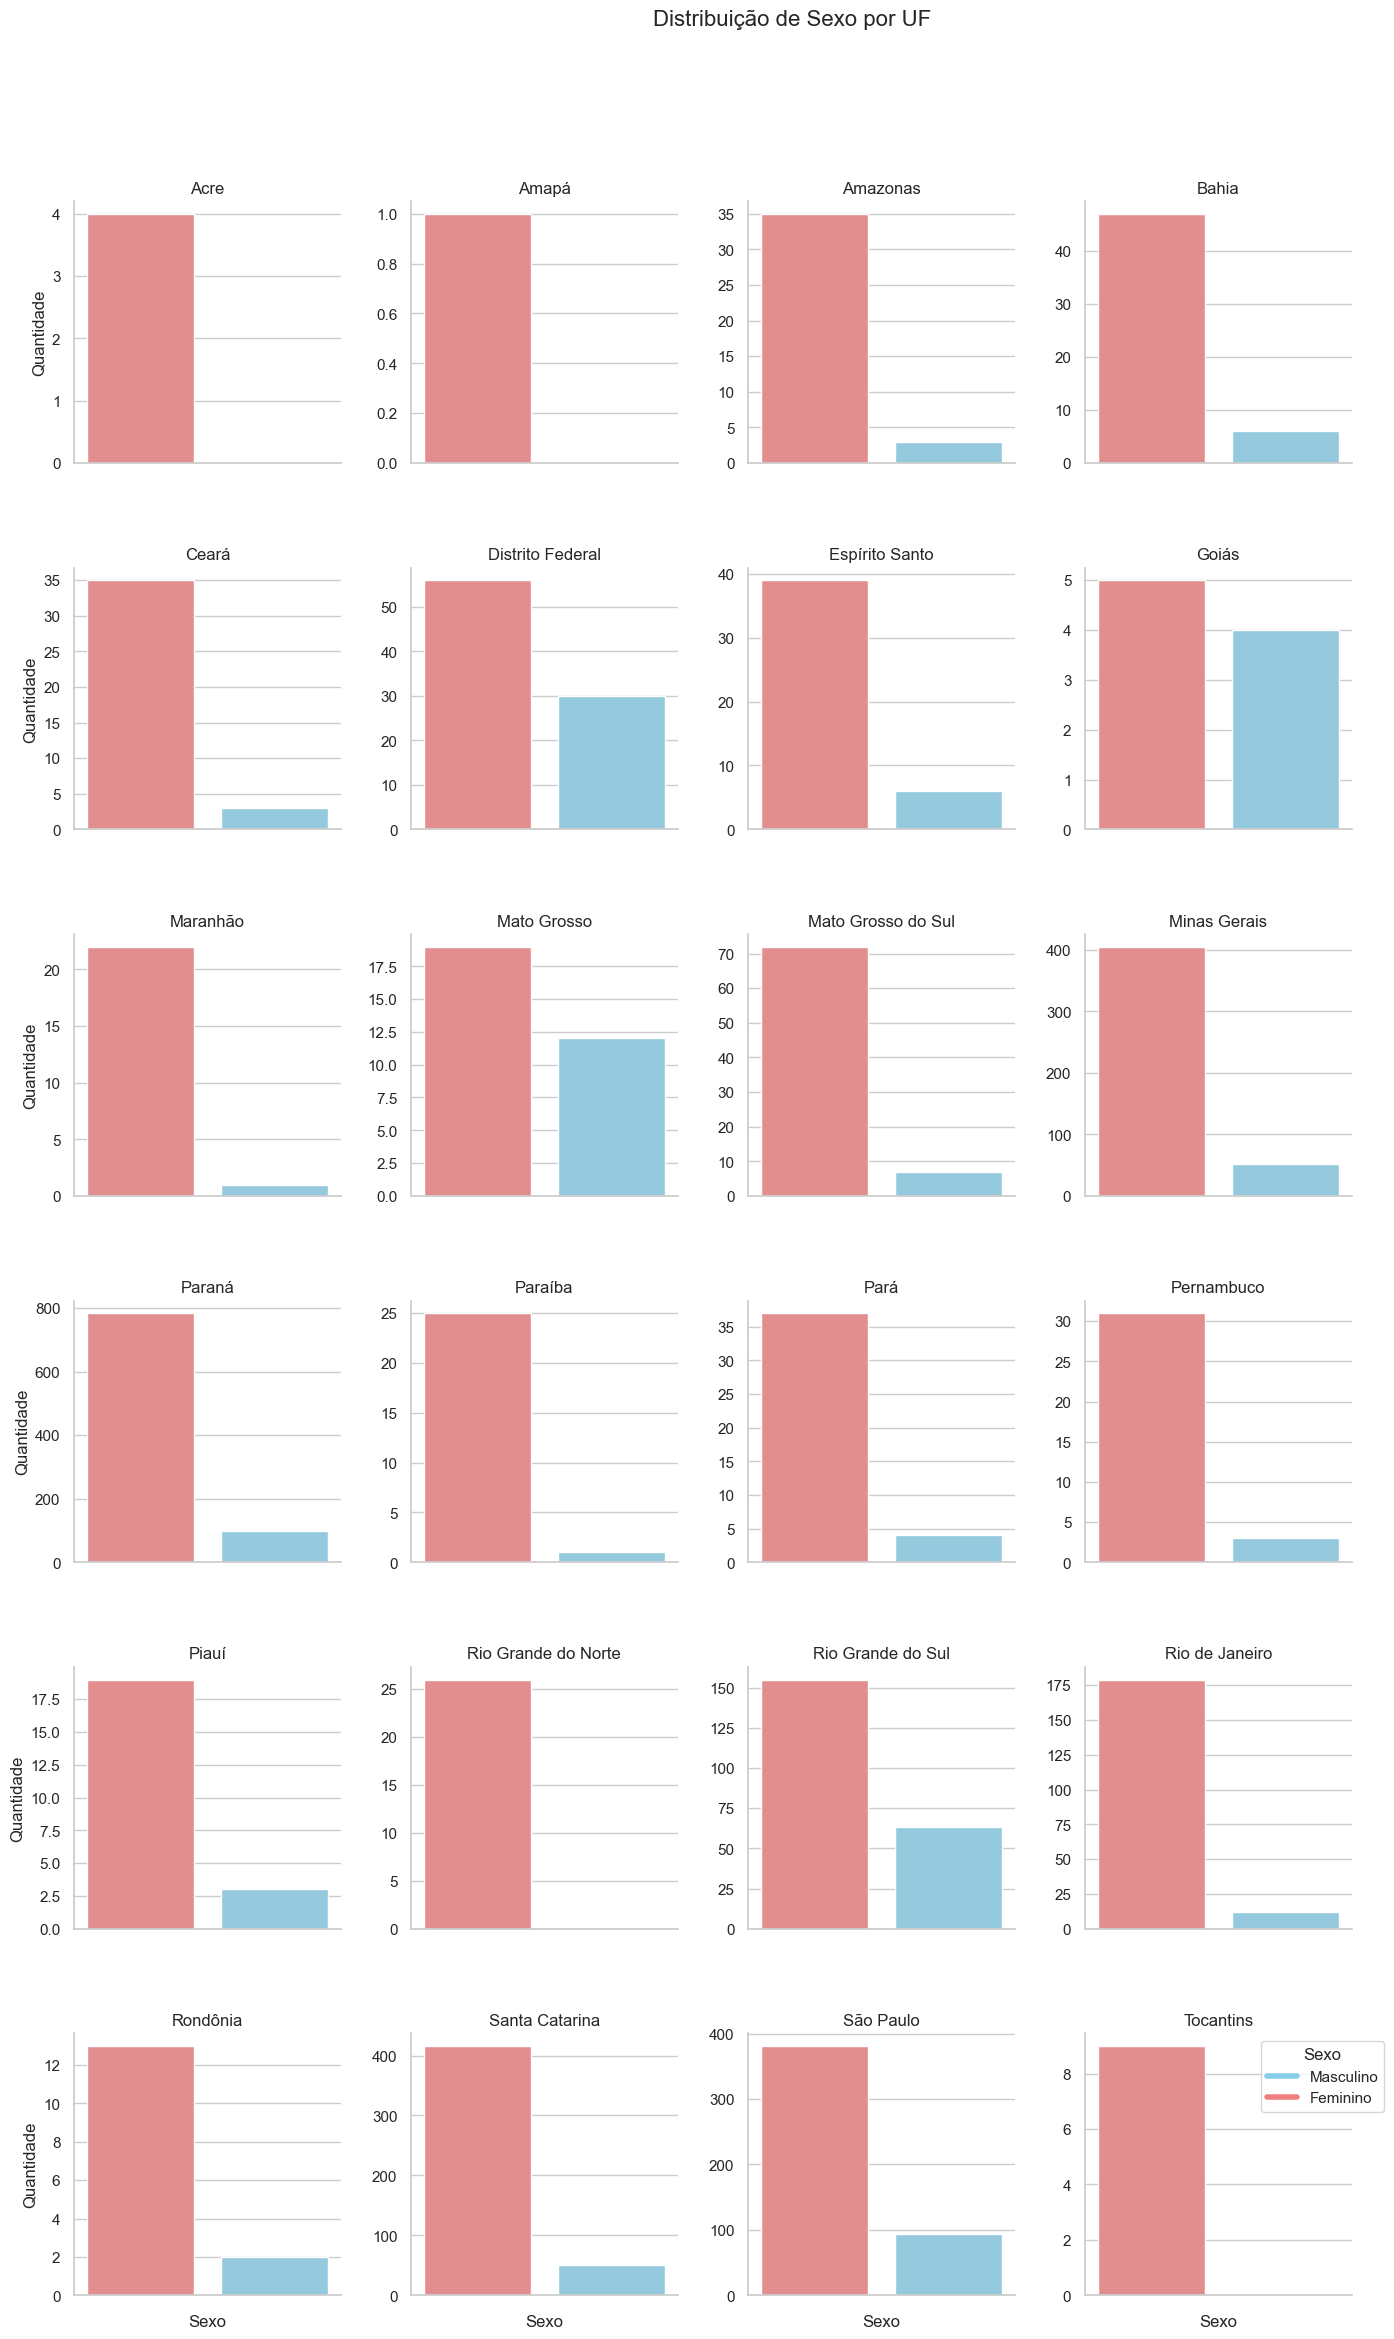

In [37]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Ordenar o dataframe por Nome_UF em ordem alfabética
df = df_resp_familiar.sort_values(by="Nome_UF")

# Definir a paleta de cores manualmente
palette = {"Masculino": "skyblue", "Feminino": "lightcoral"}

# Criar o FacetGrid para o gráfico de sexo
g_sexo = sns.FacetGrid(df, col="Nome_UF", col_wrap=4, height=4, sharey=False, legend_out=True)
g_sexo.map_dataframe(
    sns.countplot,
    x="rf_sexo",
    hue="rf_sexo",
    palette=palette
)

# Ajustar os rótulos do eixo X e título
g_sexo.set_xticklabels(rotation=45, ha="right")
g_sexo.set_axis_labels("Sexo", "Quantidade")

# Criar a legenda manualmente fora do grid
handles = [plt.Line2D([0], [0], color="skyblue", lw=4, label="Masculino"),
           plt.Line2D([0], [0], color="lightcoral", lw=4, label="Feminino")]
plt.legend(handles=handles, title="Sexo", loc='upper right', bbox_to_anchor=(1.15, 1))

# Remover "Nome_UF = ..." e exibir apenas o nome do estado
for ax in g_sexo.axes.flat:
    titulo = ax.get_title().split('=')[1].strip()
    ax.set_title(titulo)

# Ajustar o layout e exibir o gráfico
plt.subplots_adjust(top=0.9, hspace=0.4, right=0.85)
g_sexo.fig.suptitle("Distribuição de Sexo por UF", fontsize=16)
plt.show()